<a href="https://colab.research.google.com/github/jlgjosue/ia-dl-unyleya/blob/master/Tarefa_6_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>Leia o segundo capítulo da Unidade 3 e replique os exemplos apresentados, analisando-o linha a linha e comentando a função de cada comando presente no código. Comente cada saída gerada, justificando-a.
<p>Você deverá enviar o código em Python.

Inicialmente, vamos importar o numpy e definir o conjunto de dados de treinamento  e o conjunto de rótulos .  é bidimensional, visto que a primeira dimensão representa cada subconjunto da amostra. Como nosso conjunto de dados é pequeno, não há necessidade de fazer a divisão em subconjuntos menores:

In [0]:
 import numpy as np

  

 # A primeira dimensão representa o subconjunto

 x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])

  

 y = np.array([3])


A relação de recorrência desta rede é um modelo linear definido por  que pode ser implementada como:

In [0]:
def step(s, x, U, W):

  return x * U + s * W

Backpropagation ao longo do tempo é um algoritmo tipicamente utilizado para treinar redes recursivas. A diferença entre essa técnica e um Backpropagation normal é que uma RNN é desdobrada ao longo do tempo algumas vezes. Sendo assim, após o desdobramento de toda a rede, teremos um modelo similar a uma rede Feedforward com multicamadas. Ou seja, cada camada oculta em uma rede Feedforward pode ser comparada com uma interação da rede recursiva, porém, com várias entradas para cada camada, o estado prévio  e a entrada atual , os parâmetros  e  serão comuns para todas as camadas ocultas.

O passo adiante (forward pass) desdobra a RNN ao longo da sequência e constrói uma pilha de estados a cada interação. A seguir, veja a implementação do forward pass, que retornará a ativação  para cada interação recorrente e cada valor do conjunto:

In [0]:
def forward(x, U, W):

        # Número de amostras do subconjunto

        number_of_samples = len(x)

    

        # Tamanho de cada amostra

        sequence_length = len(x[0])

    

        # Inicialize o estado de ativação para cada amostra da

        # sequência

        s = np.zeros((number_of_samples, sequence_length + 1))

    

        # Atualize os estados no decorrer da sequencia

        for t in range(0, sequence_length):

            s[:, t + 1] = step(s[:, t], x[:, t], U, W) # step Function

    

        return s

(-1.4132960713900213, -0.8620479997571472)


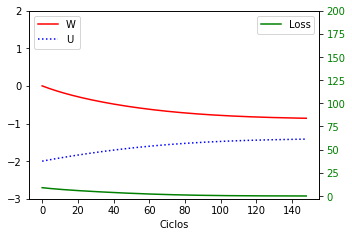

In [17]:
def backward(x, s, y, W):

   sequence_length = len(x[0])
     

   # A saída da rede é apenas a última ativação da sequência

   s_t = s[:, -1]

       

   # Calcule o gradiente de saída w.r.t. Função de custo

   # MSE do estado final.

   gS = 2 * (s_t - y)
      

   # Defina as acumulações gradientes em 0

   gU, gW = 0, 0

   

   # Retroceda acumulando os gradientes

   for k in range(sequence_length, 0, -1):

       # Calcule os gradientes dos parâmetros e acumule os

       # resultados

       gU += np.sum(gS * x[:, k - 1])

       gW += np.sum(gS * s[:, k - 1])

    

   # Calcule o gradiente de saída para a camada anterior

   gS = gS * W
    

   return gU, gW

#A partir de agora, é possível utilizar o Gradiente Descendente para otimizar a rede. Vamos utilizar o erro quadrático médio:

def train(x, y, epochs, learning_rate=0.0005):

   """Train the network"""

    

   # Defina os parâmetros iniciais

   weights = (-2, 0) # (U, W)

   # Acumule as perdas e seus respectivos pesos

   losses = list()

   weights_u = list()

   weights_w = list()


   # Execute o gradiente descendente interativo

   for i in range(epochs):

       # Execute os passos adiante e para trás para oobter

       # os gradientes

       s = forward(x, weights[0], weights[1])


       # Calcule a função de custo MSE

       loss = (y[0] - s[-1, -1]) ** 2


       # Armazene os valores de perda e pesos para mostrar

       # depois

       losses.append(loss)


       weights_u.append(weights[0])

       weights_w.append(weights[1])

      

       gradients = backward(x, s, y, weights[1])

       # Atualize cada parâmetro ‘p’ para p = p-(gradiente

       # * taxa_aprendizado)

       # ‘gp’ é o gradiende do parâmetro ‘p’

       weights = tuple((p - gp * learning_rate) for p, gp

            in zip(weights, gradients))

       

   print(weights)

   return np.array(losses), np.array(weights_u), np.array(weights_w)

# Em seguida, implementaremos a função plot_training, que exibe os pesos e perda:

def plot_training(losses, weights_u, weights_w):

   import matplotlib.pyplot as plt
  # Remove os valores nan e inf

   losses = losses[~np.isnan(losses)][:-1]

   weights_u = weights_u[~np.isnan(weights_u)][:-1]

   weights_w = weights_w[~np.isnan(weights_w)][:-1]

  # Mostra os pesos U e W

   fig, ax1 = plt.subplots(figsize=(5, 3.4))

   ax1.set_ylim(-3, 2)

   ax1.set_xlabel('Ciclos')

   ax1.plot(weights_w, label='W', color='red',  linestyle='-')

   ax1.plot(weights_u, label='U', color='blue', linestyle=':')

   ax1.legend(loc='upper left')



   # Instancia um novo eixo que compartilha o mesmo eixo x

   # Mostra a perda no Segundo eixo

   ax2 = ax1.twinx()
   

   # Retire os comentários para mostrar os gradientes

   ax2.set_ylim(-3, 200)

   ax2.plot(losses, label='Loss', color='green')

   ax2.tick_params(axis='y', labelcolor='green')

   ax2.legend(loc='upper right')

   fig.tight_layout()

   plt.show()

  #Agora, com o código pronto, é possível executá-lo:

losses, weights_u, weights_w = train(x, y, epochs=150)

#plot_training(losses, weights_u, weights_w)
plot_training(losses=losses, weights_u=weights_u, weights_w=weights_w)

(-0.5428234330925533, -1.0252349172533597)


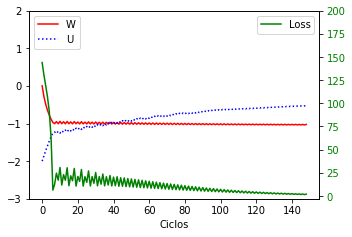

In [18]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
1, 0, 1, 0, 1, 0]])

y = np.array([12])

losses, weights_u, weights_w = train(x, y, epochs=150)

plot_training(losses, weights_u, weights_w)


In [0]:
      """

            Processamento de arquivo de texto para treinamento de

            modelos de linguagem

       """

       from __future__ import print_function, division

       import codecs

       import re

        

      """

            Baixe os arquivos war_and_peace.txt e wap.txt no link

            https://github.com/ivan-vasilev/Python-Deep-Learning-

            SE/tree/master/ch07/language%20model. E salve na pasta

            do projeto.

       """

           filepath = 'war_and_peace.txt' # entrada

           out_file = 'wap.txt' # alvos

            

           # Regexes usados para limpar o texto

           NEW_LINE_IN_PARAGRAPH_REGEX = re.compile(r'(\S)\n(\S)')

           MULTIPLE_NEWLINES_REGEX = re.compile(r'(\n)(\n)+')

            

           # Lendo o texto como string

           with codecs.open(filepath, encoding='utf-8', mode='r') as

                f_input:

                    book_str = f_input.read()

            

           # Limpando

           book_str = NEW_LINE_IN_PARAGRAPH_REGEX.sub('\g<1> \g<2>',

                book_str)

           book_str = MULTIPLE_NEWLINES_REGEX.sub('\n\n', book_str)

           book_str = re.sub(u'[\u201c\u201d]', '"', book_str)

            

           # Escrevendo o texto processado em um arquivo

           with codecs.open(out_file, encoding='utf-8', mode='w')as

                f_output:

                    f_output.write(book_str)

In [51]:
class DataReader(object):
  def __init__(self, filepath, batch_length, batch_size):

            self.batch_length = batch_length

            self.batch_size = batch_size

            # Lendo os dados para uma String

            with codecs.open(filepath, encoding='utf-8',

                 mode='r') as f:

                      self.data_str = f.read()

            self.data_length = len(self.data_str)

            print('data_length: ', self.data_length)

            # Criar uma lista de caracteres, os índices são os

            # mesmos das classes para softmax.

            char_set = set()

            for ch in self.data_str:

                 char_set.add(ch)

            self.char_list = sorted(list(char_set))

            print('char_list: ', len(self.char_list),

                 self.char_list)

            # Criar mapeamento reverse para verificar os

            # índices com base nos caracteres.

            self.char_dict = {val: idx for idx, val in

                 enumerate(self.char_list)}

            print('char_dict: ', self.char_dict)

            # Inicializar índices iniciais aleatórios

            self.reset_indices()

    

  def reset_indices(self):

            self.start_idxs = np.random.random_integers(

                 0, self.data_length, self.batch_size)

    

  def get_sample(self, start_idx, length):

            # Obtenha uma amostra e envolva a sequência de dados

            return [self.char_dict[self.data_str[i %

                 self.data_length]]

                 for i in range(start_idx, start_idx + length)]

    
  def get_input_target_sample(self, start_idx):

            sample = self.get_sample(start_idx,

                 self.batch_length + 1)

            inpt = sample[0:self.batch_length]

            trgt = sample[1:self.batch_length + 1]

            return inpt, trgt

    

  def get_batch(self, start_idxs):

            input_batch = np.zeros((self.batch_size,

                 self.batch_length), dtype=np.int32)

            target_batch = np.zeros((self.batch_size,

                 self.batch_length), dtype=np.int32)

            for i, start_idx in enumerate(start_idxs):

                 inpt, trgt =   self.get_input_target_sample(start_idx)

                 input_batch[i, :] = inpt

                 target_batch[i, :] = trgt

            return input_batch, target_batch

    

  def __iter__(self):

            while True:

                 input_batch, target_batch = self.get_batch(self.start_idxs)

                 self.start_idxs = (self.start_idxs +

                      self.batch_length) % self.data_length

                 yield input_batch, target_batch

    

  def main():

        filepath = './wap.txt'

        batch_length = 10

        batch_size = 2

        reader = DataReader(filepath, batch_length, batch_size)

        s = 'As in the question of astronomy then, so in the question of history now,'

        print([reader.char_dict[c] for c in s])

    

    

if __name__ == "__main__":  
   main()

data_length:  67457
char_list:  91 ['\n', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '·', '’', '↵']
char_dict:  {'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '%': 5, '&': 6, "'": 7, '(': 8, ')': 9, '+': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '<': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: This function is deprecated. Please call randint(0, 67457 + 1) instead


In [0]:
#Após o pré-processamento, é possível criar a rede LSTM. Será treinada uma rede LSTM de duas camadas com 512 células cada camada (arquivo model.py do github):
from __future__ import print_function, division
import time   
import data_reader
import numpy as np
import tensorflow as tf
class Model(object):
  """Modelo de RNN para Processamento de Linguagem"""
  def __init__(self, batch_size, sequence_length, lstm_sizes, dropout, labels, save_path):

                 self.batch_size = batch_size

                 self.sequence_length = sequence_length

                 self.lstm_sizes = lstm_sizes

                 self.labels = labels

                 self.label_map = {val: idx for idx, val in enumerate(labels)}

                 self.number_of_characters = len(labels)

                 self.save_path = save_path

                 self.dropout = dropout

#Inicialmente, serão definidos os espaços reservados (placeholder), que são os links entre o modelo e o conjunto de treinamento, para as entradas e alvos. A rede pode ser alimentada com um lote único ao definirmos este valor no placeholder. A primeira dimensão, tanto da entrada quanto do alvo, é o tamanho do lote; a segunda dimensão é o tamanho da sequência no texto.
  def init_graph(self):

            # Tamanho da sequência de variáveis

            self.inputs = tf.placeholder(tf.int32, [self.batch_size,

                 self.sequence_length])

            self.targets = tf.placeholder( tf.int32, [self.batch_size, self.sequence_length])

            self.init_architecture()

            self.saver = tf.train.Saver(tf.trainable_variables())

In [0]:
Após a definição da entrada, alvos e arquitetura de rede, é possível implementar o treinamento. Inicialmente, é necessário definir a função de perda, que será a função de entropia cruzada. Os dados devem ser remodelados em um vetor unidimensional para que sejam compatíveis com o logit de saída da rede. Em seguida, será definida a operação de treinamento do Tensorflow:

               def init_train_op(self, optimizer):

                   # Remodelando o salvos para que sejam compatíveis

                   # com o formato dos Logits

                   targets_flat = tf.reshape(self.targets, (-1,))

                   # Aplicar a função de perda em todas as saídas

                   loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.logits_flat, labels=targets_flat, name='x_entropy')

                   self.loss = tf.reduce_mean(loss)

                   trainable_variables = tf.trainable_variables()

                   gradients = tf.gradients(loss, trainable_variables)

                   gradients, _ = tf.clip_by_global_norm(gradients, 5)

                   self.train_op =

                        optimizer.apply_gradients(zip(gradients,

                        trainable_variables))

Uma vez que o modelo já está treinado, é possível gerar um texto a partir de amostras das sequências. Vamos apresentar ao modelo uma string inicial (prime_string), a partir daí, é possível gerar o próximo caractere baseado na distribução da softmax, então, este será passado para a rede e um novo caractere será gerado, e isso será feito várias vezes:

               def sample(self, session, prime_string, sample_length):

                   self.reset_state(session)

                   # Estado inicial

                   print('prime_string: ', prime_string)

                   for character in prime_string:

                        character_idx = self.label_map[character]

                        out = session.run(self.probabilities, feed_dict={self.inputs:

                             np.asarray([[character_idx]])})

                   output_sample = prime_string

                   print('start sampling')

                   # Amostrar por sample_length passos

                   for _ in range(sample_length):

                        sample_label = np.random.choice( self.labels, size=(1), p=out[0, 0])[0]

                        output_sample += sample_label

                        sample_idx = self.label_map[sample_label]

                        out = session.run(

                             self.probabilities,

                             feed_dict={self.inputs:

                             np.asarray([[sample_idx]])})

           

                   return output_sample

#Com as funções de treinamento e amostragem definidas, vamos finalizar o código e rodar para gerar texto:

               def reset_state(self, session):

                   for state in

                        tf.contrib.framework.nest.flatten(self.state_variables):

                             session.run(state.initializer)

           

               def save(self, sess):

                   self.saver.save(sess, self.save_path)

           

               def restore(self, sess):

                   self.saver.restore(sess, self.save_path)

           

          def train_and_sample(minibatch_iterations, restore):

               tf.reset_default_graph()

               batch_size = 64

               lstm_sizes = [512, 512]

               batch_len = 100

               learning_rate = 2e-3

           

               filepath = './wap.txt'

           

               data_feed = data_reader.DataReader(filepath, batch_len, batch_size)

               labels = data_feed.char_list

               print('labels: ', labels)

           

               save_path = './model.tf'

               model = Model( batch_size, batch_len, lstm_sizes, 0.8, labels, save_path)

               model.init_graph()

               optimizer = tf.train.AdamOptimizer(learning_rate)

               model.init_train_op(optimizer)

           

               init_op = tf.initialize_all_variables()

               with tf.Session() as sess:

                   sess.run(init_op)

                   if restore:

                        print('Restoring model')

                        model.restore(sess)

                   model.reset_state(sess)

                   start_time = time.time()

                   for i in range(minibatch_iterations):

                        input_batch, target_batch =

                             next(iter(data_feed))

                        loss, _ = sess.run([model.loss, model.train_op], feed_dict={model.inputs: input_batch, model.targets: target_batch})

                        if i % 50 == 0 and i != 0:

                             print('i: ', i)

                             duration = time.time() - start_time

                             print('loss: {} ({} sec.)'.format(loss,

                                  duration))

                             start_time = time.time()

                        if i % 1000 == 0 and i != 0:

                             model.save(sess)

                        if i % 100 == 0 and i != 0:

                             print('Reset initial state')

                             model.reset_state(sess)

                        if i % 1000 == 0 and i != 0:

                             print('Reset minibatch feeder')

                             data_feed.reset_indices()

                   model.save(sess)

           

               print('\n sampling after {}iterations'.format(minibatch_iterations))

               tf.reset_default_graph()

               model = Model(1, None, lstm_sizes, 1.0, labels, save_path)

               model.init_graph()

               init_op = tf.initialize_all_variables()

               with tf.Session() as sess:

                   sess.run(init_op)

                   model.restore(sess)

                   print('\nSample 1:')

                   sample = model.sample(sess, prime_string=u'\n\nThis feeling was ', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

                   print('\nSample 2:')

                   sample = model.sample(sess, prime_string=u'She was born in the year', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

                   print('\nSample 3:')

                   sample = model.sample(sess, prime_string=u'The meaning of this all is', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

                   print('\nSample 4:')

                   sample = model.sample( sess, prime_string=u'In the midst of a conversation on political matters Anna Pávlovna burst out:,', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

                   print('\nSample 5:')

                   sample = model.sample(  sess, prime_string=u'\n\nCHAPTER X\n\n', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

                   print('\nSample 6:')

                   sample = model.sample( sess, prime_string=u'\"If only you knew,\"', sample_length=500)

                   print(u'sample: \n{}'.format(sample))

           

           

          def main():
               print("Generating new text with character-levelTensorFlow LSTM")           

               total_iterations = 500

               print('\n\n\nTrain for {}'.format(500))

               print('Total iters: {}'.format(total_iterations))

               train_and_sample(500, restore=False)

               for i in [500, 1000, 3000, 50